# Сборный проект. Интернет-магазин компьютерных игр «Стримчик» 

<strong>Описание проекта:</strong>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

<strong>План проекта:</strong>

 <strong>1</strong> [Загрузка данных](#section_id)

<strong>2</strong> [Подготовка данных](#section_id2)

2.1 [Приведение наименований столбцов к нижнему регистру](#3)

2.2 [Преобразование данных в нужные типы](#4)

2.3 [Проверка на дубликаты](#5)

2.4 [Обработка пропущенных значений](#6)

2.5 [Подсчет суммарных продаж аждой игры во всех регионах](#7)

2.6 [Переименование названий рейтинга](#8)

<strong>3</strong> [Исследовательский анализ данных](#9)

3.1 [Сколько игр выпускалось в разные годы?](#10)

3.2 [Распределение платформ по годам](#11)

3.3 [Рассмотрим данные за актуальный период](#12)

3.4 [Рассмотрим платформы-лидеры продаж](#13)

3.5 [Построим Boxplot по самым популярным платформам](#14)

3.6 [Продажи игр в зависимости от оценок пользователей](#15)

3.7 [Продажи игр в зависимости от жанров](#16)

<strong>4</strong> [Составим портрет пользователя каждого региона](#17)

4.1 [Самые популярные платформы (топ-5)](#18)

4.2 [Самые популярные жанры (топ-5)](#19)

4.3 [Влияет ли рейтинг ESRB на продажи в отдельных регионах](#20)

<strong>5</strong> [Проверка гипотез](#21)

5.1 [Проверка гипотез схожести средних рейтингов платформ Xbox One и PC](#22)

5.2 [Проверка гипотез схожести средних рейтингов жанров Action и Sports](#23)

<strong>6</strong> [Общий вывод](#24)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import re

### Загрузка данных
<a id='section_id'></a>

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/games.csv')
# Знакомимся с внешним представлением датафрейма
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
# Знакомимся с пропущенными значениями и типами данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в датафрейме 16715 строк, есть пропущенные значения в колонках: Name, Year_of_Release, Critic_Score, User_Score, Rating.

### Подготовка данных
<a id='section_id2'></a>

#### Приведение наименований столбцов к нижнему регистру 
<a id='3'></a>

In [4]:
data.columns = data.columns.str.lower()

#### Преобразование данные в нужные типы
<a id='4'></a>

In [5]:
# Методом to_numeric и параметром errors все tbd в user_score, преращаем в NaN, все что не NaN, превращаем в float,
# используя параметр downcast.
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce', downcast='float')
# Преобразуем тип данных year_of_release в Int64
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: Int64(1), float32(1), float64(5), object(4)
memory usage: 1.4+ MB


По своей сути tbd это отсутствие рейтинга игры, может быть игра появилась до появления рейтинговой системы, может просто рейтинг этой игры еще не сформировался. TBD можно расценивать как NaN, поэтому было принято решение преобразовать их в NaN.

#### Проверка на дубликаты
<a id='5'></a>

In [6]:
print(f'Явных дубликатов в датафрейме: {data.duplicated().sum()}')
print()
print('Дубликаты в колонках:')
for i in data.columns:
    print(f'{i}: {data[i].duplicated().sum()}') 

Явных дубликатов в датафрейме: 0

Дубликаты в колонках:
name: 5155
platform: 16684
year_of_release: 16677
genre: 16702
na_sales: 16313
eu_sales: 16408
jp_sales: 16471
other_sales: 16560
critic_score: 16632
user_score: 16619
rating: 16706


Явных дубликатов нет. Дубликаты во всех имеющихся столбцах допустимы. Могут быть одинаковые суммы продаж, одинаковый рейтинг, год выпуска и т.д. Выполним дополнительную проверку по дубликатам "name" на примере одной популярной игры, проверим почему там есть дубликаты. 

In [7]:
# Проверим один из дубликатов в name
print(data[data['name'] == 'Grand Theft Auto V'])

                    name platform  year_of_release   genre  na_sales  \
16    Grand Theft Auto V      PS3             2013  Action      7.02   
23    Grand Theft Auto V     X360             2013  Action      9.66   
42    Grand Theft Auto V      PS4             2014  Action      3.96   
165   Grand Theft Auto V     XOne             2014  Action      2.81   
1730  Grand Theft Auto V       PC             2015  Action      0.39   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  
16        9.09      0.98         3.96          97.0         8.2      M  
23        5.14      0.06         1.41          97.0         8.1      M  
42        6.31      0.38         1.97          97.0         8.3      M  
165       2.19      0.00         0.47          97.0         7.9      M  
1730      0.69      0.00         0.09          96.0         7.9      M  


Дубликаты в name объясняются тем, что одна игра может выходить на нескольких платформах. Это не требует устранения, оставляем эти дубликаты как есть.

In [8]:
# Найдем дубликаты по ключевым столбцам.
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
# Нашлись две одинаковые строки, оставим только первую из них, она более информативна
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
На рабочих проектах стоит искать дубликаты по ключевым столбцам, для примера по сумме параметров: 
   
    ['name', 'platform', 'year_of_release']
    
С обязательным приведением содержимого категориальных колонок к нижнему регистру
        
В сырой выборке имеется 2 строчки неполных дубликатов
        
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicat#pandas.DataFrame.duplicated
    

#### Обработка пропущенных значений
<a id='6'></a>

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot=-5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

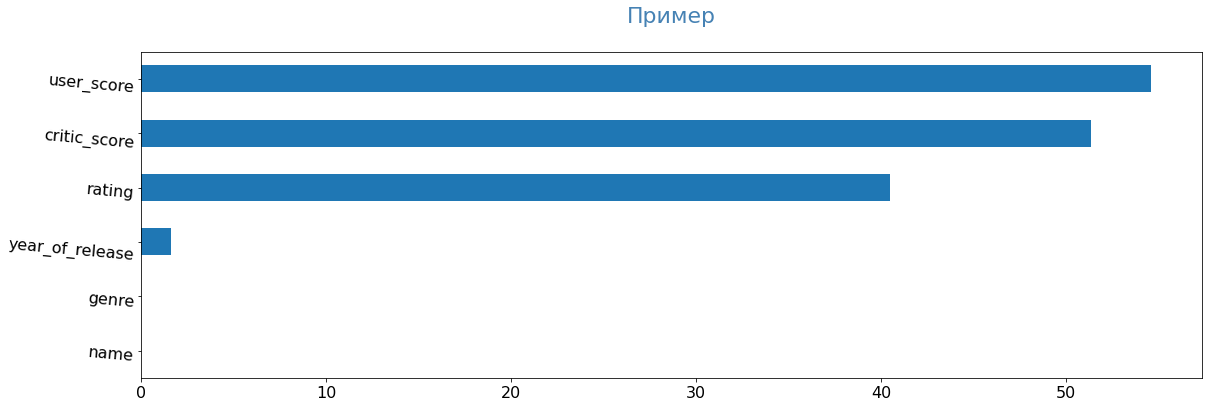

In [10]:
pass_value_barh(data)

In [11]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot=0, legend = False, fontsize = 16, grid=True, color='lightblue')
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')


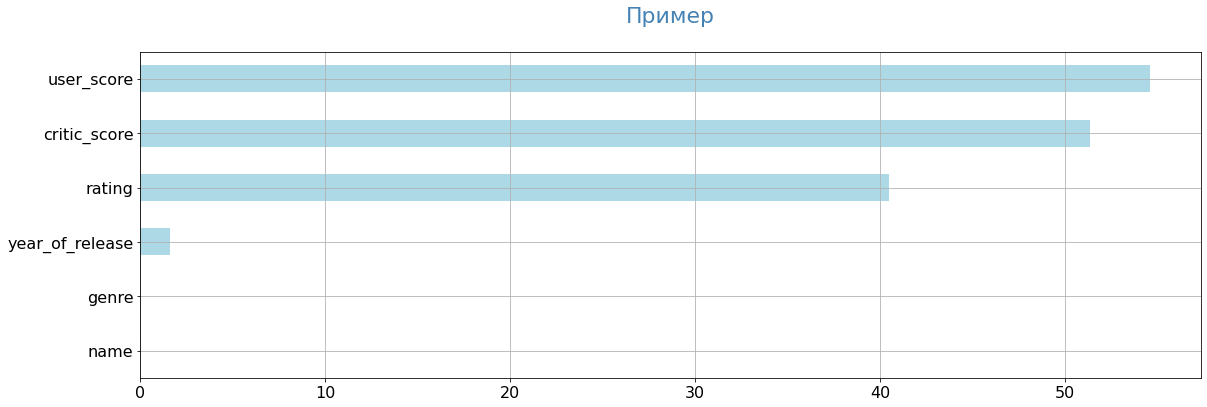

In [12]:
pass_value_barh(data)

In [13]:
# Обработаем два пропущенных значения в столбце name
data[data['name'].isna()]
# Названия восстановить не получится, так же в этих данных много пропусков в других столбцах, удалаяем эти строки
data.dropna(subset=['name'], inplace=True)

In [14]:
# Рассмотрим пропуски в year_of_release
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Всего 269 строк с пропусками в столбце year_of_release, есть часть игр с годом в названии. На сколько я помню, игра с названием типа Madden NFL 2004, в которой указан год, логично, что игра выпускается на год раньше, то есть в 2003 году. Сделаем функцию для выявления года в названии игры, затем заменим пропуски в year_of_release на нужный год.

In [15]:
def extract_year(name):
    match = re.search(r'\b[12]\d{3}\b', str(name)) # если нашлись данные типа 1999 или 2003, то заменяем year_of_release на match -1
    match2 = re.search(r'\b[01]\d\b', str(name)) # если нашлись данные типа 05 или 15, то заменяем year_of_release на match + 1999
    match3 = re.search(r'\b[89]\d\b', str(name)) # если нашлись данные типа 89 или 97, то заменяем year_of_release на match + 1899
    if match:
        return int(match.group())-1 # Итого из Fifa 2007, делаем year_of_release: 2006
    elif match2:
        return int(match2.group())+1999 # Итого из Fifa 07, делаем year_of_release: 2006
    elif match3:
        return int(match3.group())+1899 # Итого из Fifa 99, делаем year_of_release: 1998

# Применение функции к столбцу 'name' и обновление 'year_of_release'
mask = data['year_of_release'].isna()
data.loc[mask, 'year_of_release'] = data.loc[mask, 'name'].apply(extract_year)

In [16]:
print(f'После выполнения функции пропуски остались в {data["year_of_release"].isna().sum()} строках.')

После выполнения функции пропуски остались в 245 строках.


С помощью функции заполнил 24 строки year_of_release благодаря данным из name. Оставшиеся NaN значения оставим без обработки, угадать год выпуска игр не считаю возможным, на создание графиков пропуски не повлияют.

In [17]:
# Знакомство с данными в которых пропущенны значения в столбцах:  critic_score, user_score, rating.
data[data['critic_score'].isna()].head(10)
data[data['user_score'].isna()].head(10)
data[data['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Вижу что в основном строки с данными в которых есть пропуски по critic_score, user_score, rating совпадают. Скорее всего по этим данным нет или очень мало оценок критиков и пользователей, так же нет рейтинга. Заменять эти данные медианой, средним или каким либо еще значением не считаю возможным. Эти данные уникальные и индивидуальные, их не возможно угадать статистическими показателями. Оставлю эти данные в виде NaN, это не помешает нам строить графики. И не создаст концентрации значений на конкретном числе ( 0 или -1), на которое потенциально можно заменить эти данные.

####  Посчет суммарных продаж каждой игры во всех регионах и выделение их в отдельный столбец
<a id='7'></a>

In [18]:
data['total_item_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
можно
    
    df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

####  Переименуем значения рейтинга для более точного понимания их значений
<a id='8'></a>

In [19]:
data.rating.unique()
data['rating'] = data['rating'].replace({'E': 'E 10+', 'E10+': 'E 10+',
                                         'M': 'M 17+', 'T': 'T 13+', 'AO': 'AO 18+', 
                                         'EC': 'EC 3+', 'RP': 'RP не присвоен'})

<span style="font-size: 18px;"> 
Вывод: 
</span>
<span style="font-size: 16px;"> 
<br> Название колонок приведены к нижнему регистру    
<br>Были некорректные типы данных в столбцах: "year_of_release" - float64 был заменен на int64 (Для более корректного отображения данных), "user_score" -  object, был заменен на float32. В "user_score" присутствовал тип данных tbd, из-за этого пришлось применить метод to_numeric, заменив все tbd на Nan. 
Тип float32 не стал приводить к float64, из-за того, что в наших данных только один знак после запятой, float32 обеспечит нужную точность данных, так же увеличит скорость обработки этих данных и сэкономит память. На данном датафрейме эта экономия конечно не будет заметна, но если код работает, то лучше ничего не менять.
<br> Значимых для исправления дубликатов обнаружено не было.  
<br> Пропуски, которые было возможно обработать - обработаны, остальные пропуски оставлены, они не сильно повлияют на анализ данных. 
</span>

In [20]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16712 non-null  object 
 1   platform          16712 non-null  object 
 2   year_of_release   16467 non-null  Int64  
 3   genre             16712 non-null  object 
 4   na_sales          16712 non-null  float64
 5   eu_sales          16712 non-null  float64
 6   jp_sales          16712 non-null  float64
 7   other_sales       16712 non-null  float64
 8   critic_score      8136 non-null   float64
 9   user_score        7589 non-null   float32
 10  rating            9948 non-null   object 
 11  total_item_sales  16712 non-null  float64
dtypes: Int64(1), float32(1), float64(6), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных
<a id='9'></a>

#### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?
<a id='10'></a>

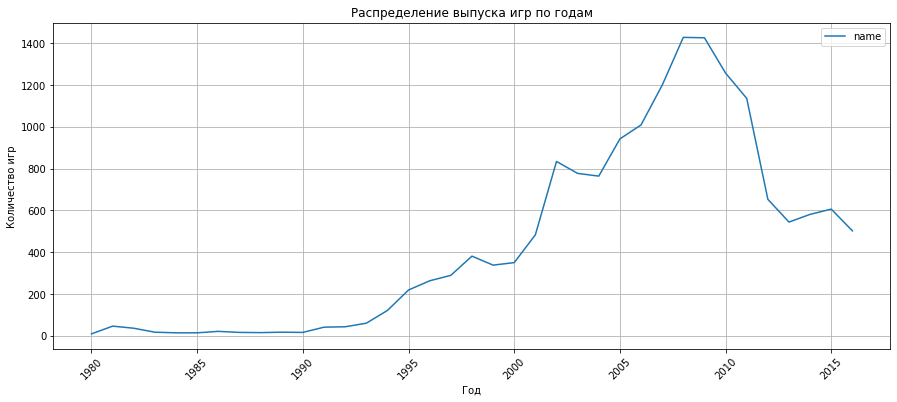

count    16467.000000
mean      2006.483027
std          5.873210
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


In [21]:
years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(15, 6))
sns.lineplot(data = years, color='blue')
plt.title('Распределение выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print(data['year_of_release'].describe())

С 1992-1993 начался рост игровой индустрии, рост был до 2009 года, далее пошло снижение до 2013 года. В 2013 году снижение приостановилось, на данном отрезке это можно назвать фазой остановки падения, стабилизации. Нам буду важны данные за более близкий к 2017 году период. Это будут данные с актуальными игровыми предпочтениями, с актуальным спросом на игры.

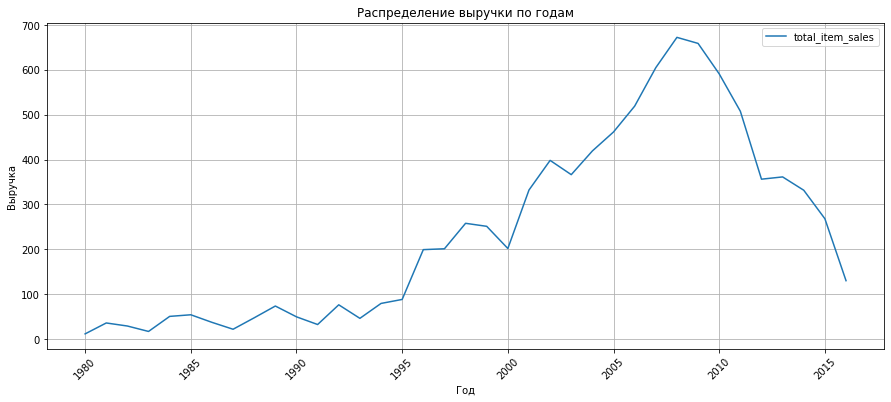

In [22]:
years = data.pivot_table(index='year_of_release', values='total_item_sales', aggfunc='sum')
plt.figure(figsize=(15, 6))
sns.lineplot(data = years, color='blue')
plt.title('Распределение выручки по годам')
plt.xlabel('Год')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

График общей выручки очень напоминает график количества игр. С 2009 года идет сильная коррекция по выручке в игровом бизнесе.

#### Распределение платформ по годам и распределение продаж игр для платформ по годам.
<a id='11'></a>

<Figure size 720x720 with 0 Axes>

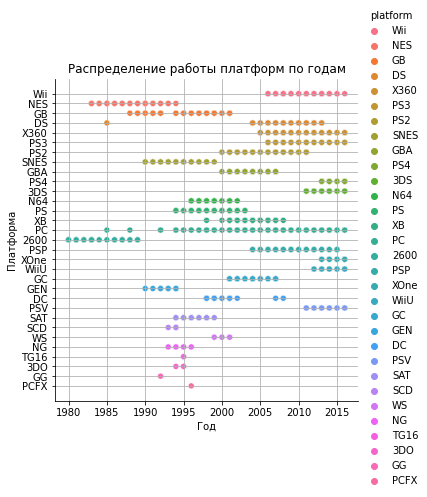

In [23]:
# Построим график со сроками жизни платформ.
plt.figure(figsize=(10, 10))
sns.set_palette('Set2')
sns.relplot(data=data, x='year_of_release', y='platform', hue='platform');
plt.title('Распределение работы платформ по годам')
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.grid(True)
plt.show()

In [24]:
# Платформа была выпущена в 2004 году.Удалим обнаруженную на графике аномалию (1985год) по платформе DS.
data = data.query('not (platform == "DS" and year_of_release < 2004)')

In [25]:
# Посчитаем средний срок жизни платформ с помошью pandas.
data_longlife = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
data_longlife['range'] = data_longlife['max'] - data_longlife['min']
data_longlife['range'].describe()

count    31.000000
mean      7.064516
std       5.921348
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: range, dtype: float64

Средний срок жизни платформ 7 с половиной лет. Некоторые платформы не просуществовали и одного целого года. Максимальный срок жизни у универсальной классики - PC, эта платформа здравствует по сей день. Половина платформ живет около 6 лет, только 25 % платформ доживают до 10 лет.

Построим графики, показывающие, как менялись продажи платформ по годам. 

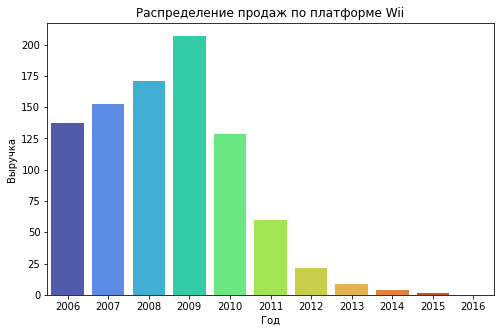

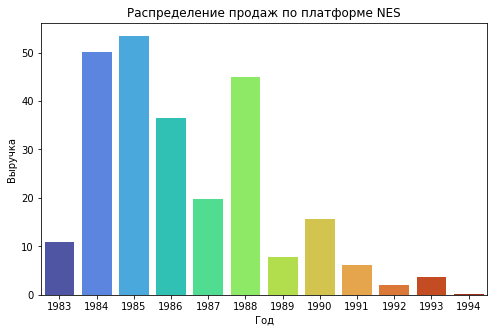

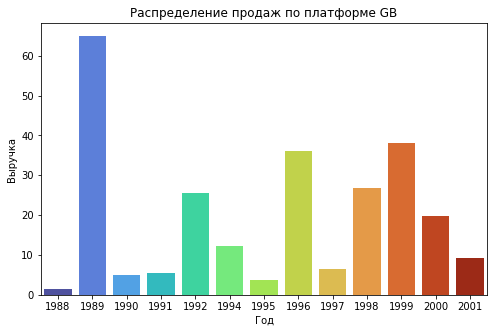

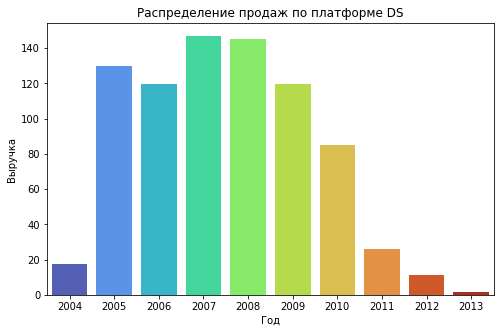

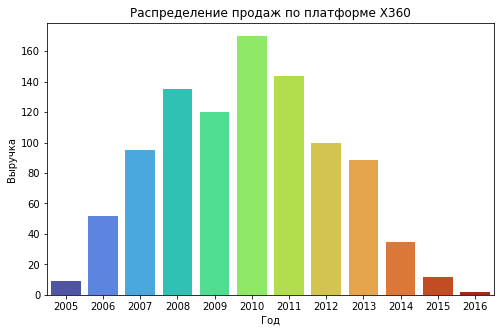

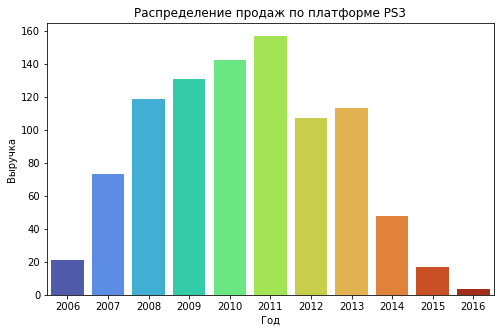

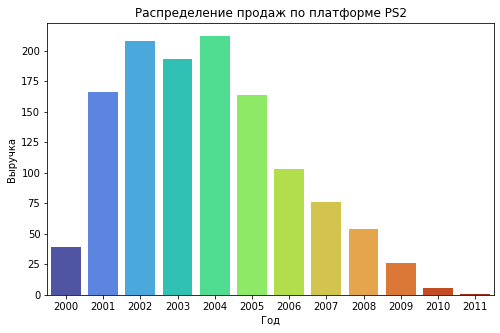

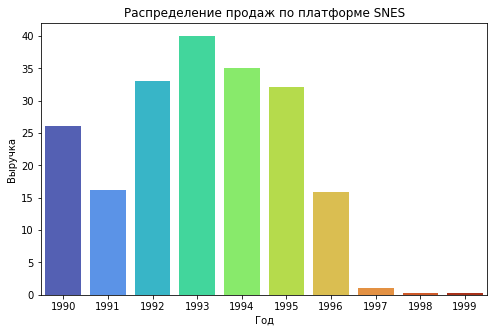

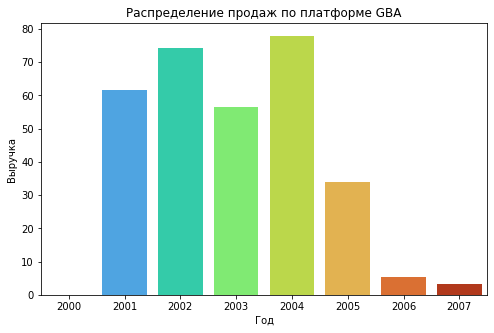

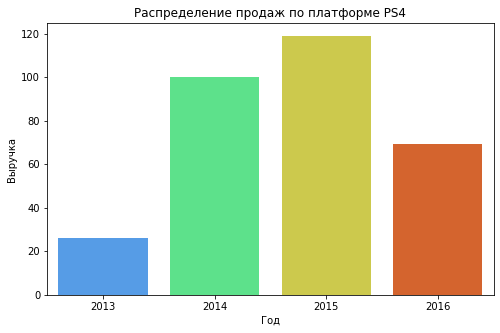

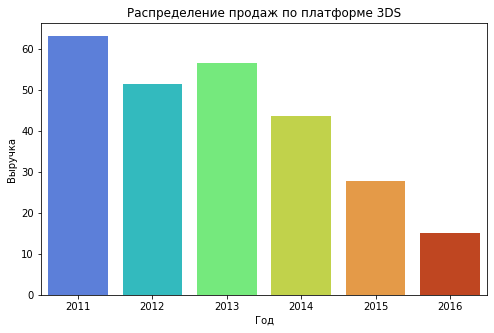

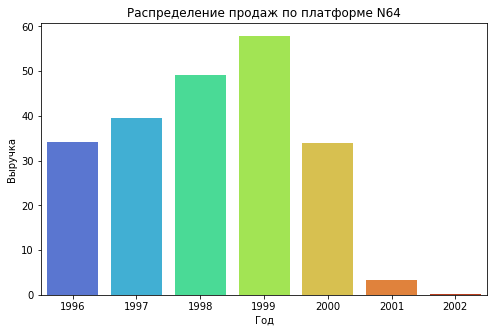

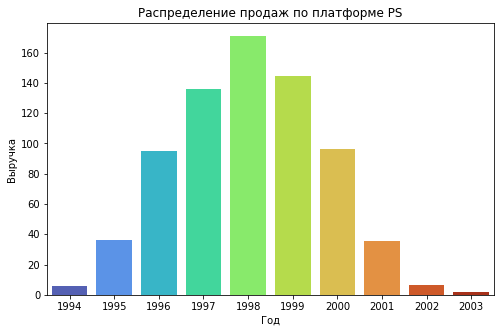

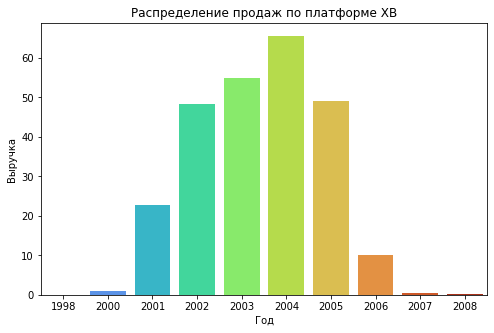

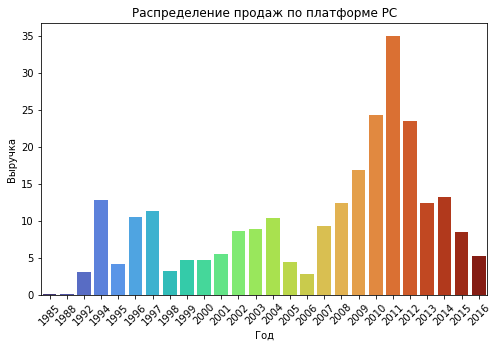

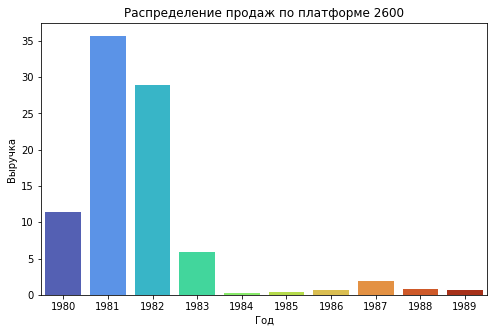

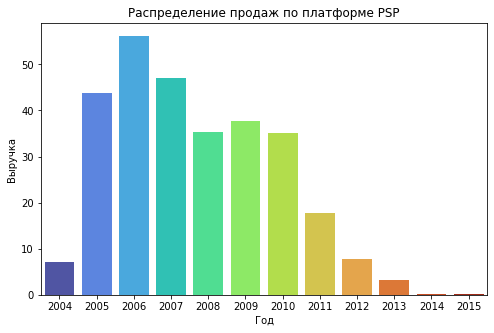

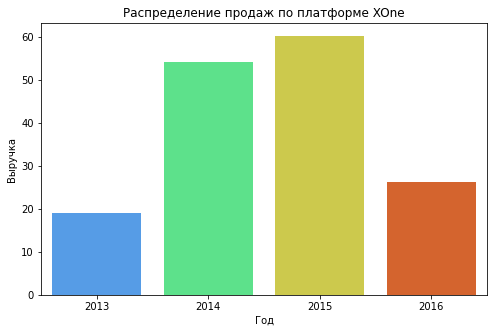

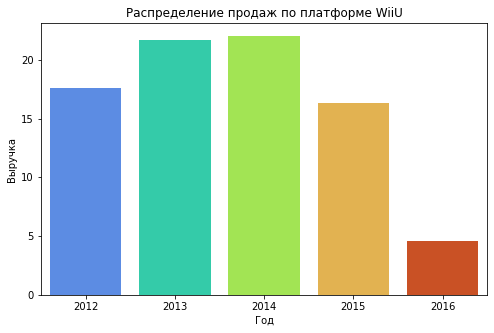

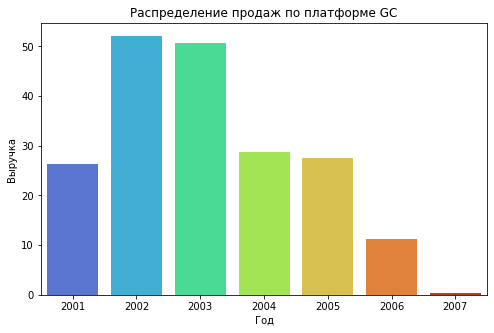

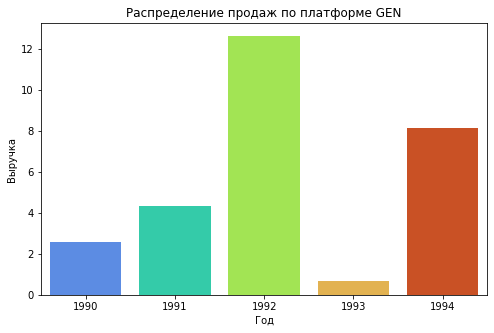

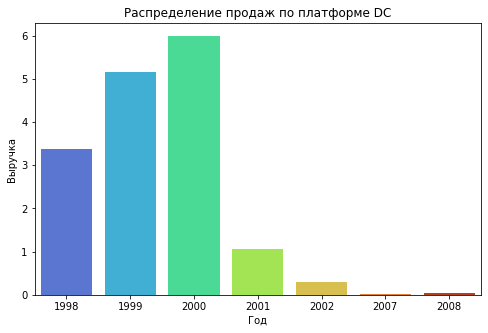

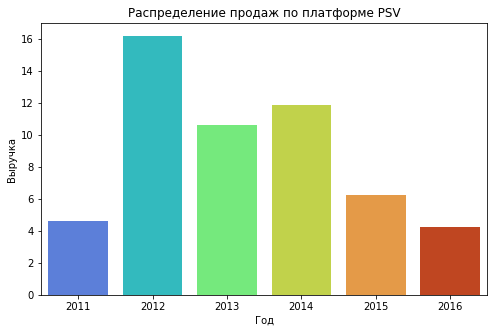

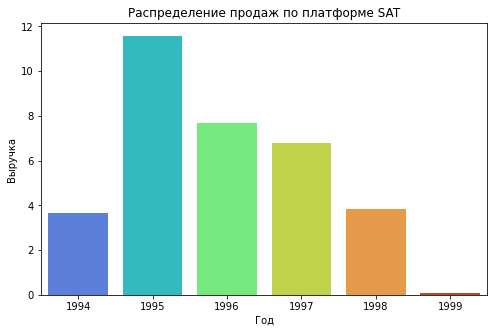

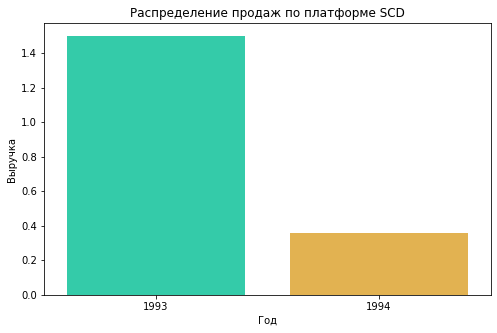

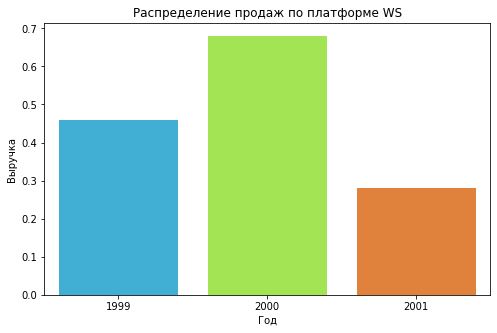

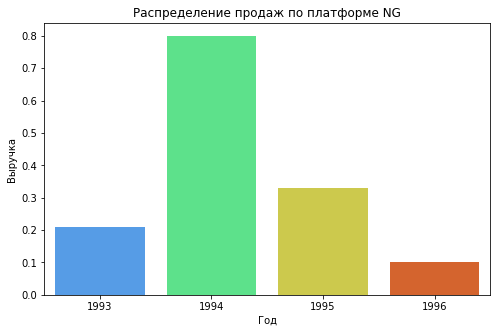

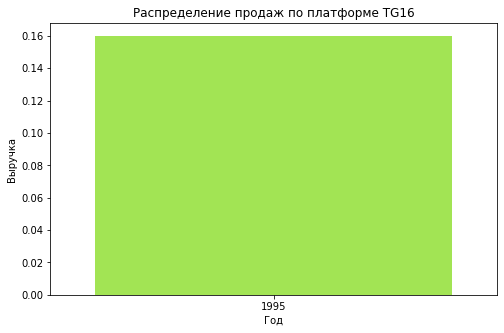

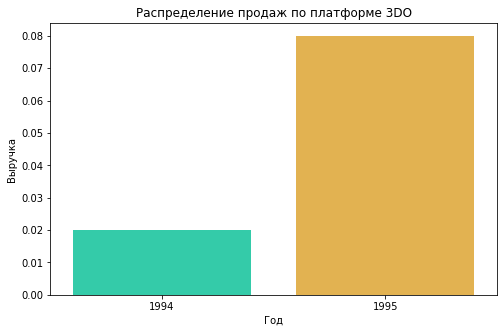

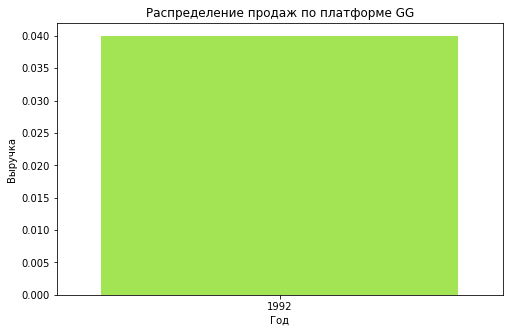

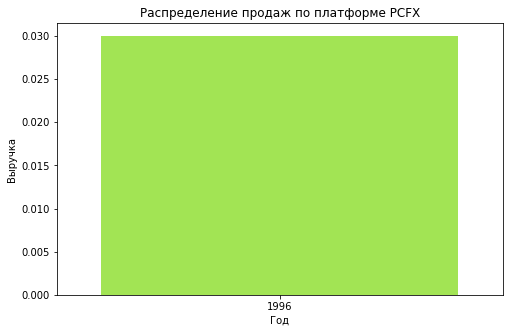

In [26]:
for platform in data.platform.unique():
    plt.figure(figsize=(8, 5))
    data_temp = data[data['platform']==platform].pivot_table(
        index='year_of_release', values='total_item_sales', aggfunc='sum')
    sns.barplot(x=data_temp.index, y='total_item_sales', data=data_temp, palette='turbo')
    plt.title(f'Распределение продаж по платформе {platform}')
    plt.xlabel('Год')
    plt.ylabel('Выручка')
    if platform == 'PC':
        plt.xticks(rotation=45)
    plt.show()

Почти у всех платформ есть свое развитие, выход на пик, и коррекция. У большинства платформ, который продержались около 10 лет, график напоминает нормальное распределение.  В целом с 2009 года, выручка по играм снижается. Возможно это из-за того что время на разработку игр увеличилось, игры выходят реже и общая выручка соответственно набирается менее интенсивно. 

#### Рассмотрим данные за актуальный период
<a id='12'></a>

В качестве актуальных данных для прогноза на 2017 год, я бы взял данные с 2014 по 2016 год.Тогда останутся все актуальные для нужного периода платформы. И в целом за этот близкий период должны быть схожие с прогнозным 2017 годом, предпочтения в играх. 

In [28]:
# Список 20 игр с самой большой выручкой
revenue_filter = data.sort_values('total_item_sales', ascending=False).head(20)
revenue_filter

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_item_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E 10+,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E 10+,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E 10+,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E 10+,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E 10+,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E 10+,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


По выборке топ 20 игр по продажам, можно сказать что там 6 игр до 2000 года, 13 игр с 2000 до 2010 год и одна игра 2013 года. Игры до 2000 года это прошлое поколение, такие игры не стоит рассматривать для нашей задачи. Игры с 2000 по 2019 год, относятся к фазе бурной популярности игр. Стабилизация падения спроса на игры началась с 2013 года, этот период стабилизации после игрового бума и стоит рассматривать. 

#### Рассмотрим какие платформы лидируют по продажам, растут или падают.
<a id='13'></a>

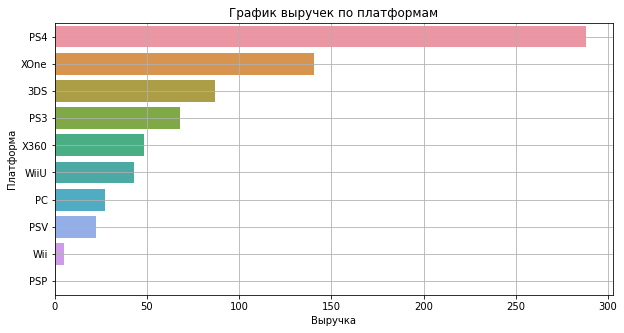

In [29]:
pivot_reven = filtered_data.pivot_table(index='platform', values=['total_item_sales'], aggfunc='sum').sort_values(by='total_item_sales', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=pivot_reven['total_item_sales'], y=pivot_reven.index)
plt.title('График выручек по платформам')
plt.xlabel('Выручка')
plt.ylabel('Платформа')
plt.grid(True)
plt.show()

In [30]:
# Создадим сводную таблицу с общим количеством игр произведенных для каждой платформы.
pivot_platf_year = filtered_data.pivot_table(index=['platform'], values='name', aggfunc='count').sort_values(by='name', ascending=False)
pivot_platf_year

,name
platform,
PS4,376
PSV,295
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13


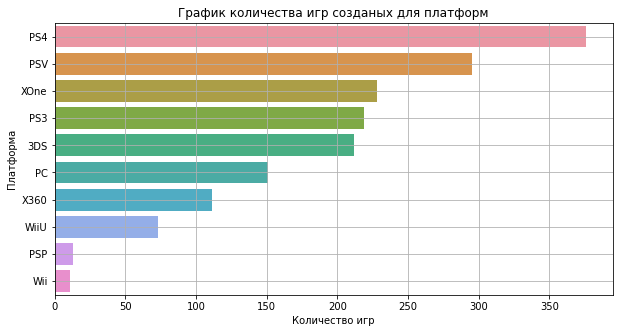

In [31]:
# Создадим визуализацию количества игр созданых для разных платформ
plt.figure(figsize=(10,5))
sns.barplot(x = pivot_platf_year.name, y=pivot_platf_year.index)
plt.title('График количества игр созданых для платформ')
plt.xlabel('Количество игр')
plt.ylabel('Платформа')
plt.grid(True)
plt.show()

Все  места в тройке лидеров по количеству игр занимает семейство Sony. Четвертое место и 300 игр - 3DS. Пятое место и примерно 250 игр - XОne.  

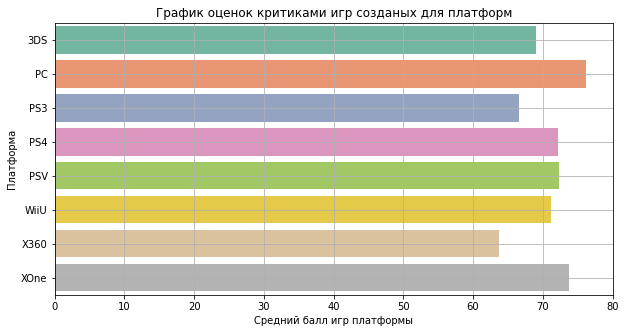

In [32]:
# Создадим визуализацию оценок критиками игр для разных платформ
crit_rating_pivot = filtered_data.pivot_table(index='platform', values='critic_score', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.barplot(x = crit_rating_pivot.critic_score, y=crit_rating_pivot.index)
plt.title('График оценок критиками игр созданых для платформ')
plt.xlabel('Средний балл игр платформы')
plt.ylabel('Платформа')
plt.grid(True)
plt.show()

Оценки критиков примерно одинаковы по всем платформам в среднем. Небольшое лидерство и PC, PSP и XOne. Самые низкие оценки у 3DS.

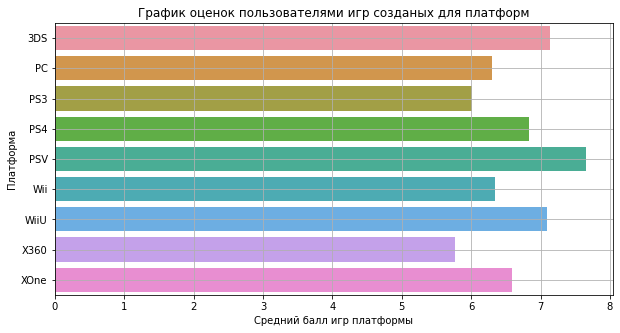

In [33]:
# Создадим визуализацию оценок пользователями игр созданых для платформ
users_rating_pivot = filtered_data.pivot_table(index='platform', values='user_score', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.barplot(x = users_rating_pivot.user_score, y=users_rating_pivot.index)
plt.title('График оценок пользователями игр созданых для платформ')
plt.xlabel('Средний балл игр платформы')
plt.ylabel('Платформа')
plt.grid(True)
plt.show()

Оценки пользователей тоже весьма близкие по играм на разных платформах. В лидерах оценок PSV, 3DS, WiiU. Самые низкие оценки у PSP, Wii, X360. 

<strong>Вывод по самым преспективным платформам:</strong><br>Если рассматривать перспективные платформы на 2017 год, то рекомендацией было бы сделать ставки топ платформы 2014-2016: PS4, PS3, 3DS, XOne, X360. Это платформы с самой высокой общей выручкой, привлекающие большую часть денег на игровом рынке. Примечание: X360 и PS3 уже исполнилось 11 лет и они с малой вероятностью станут перспективными или сохранят продажи в 2017 году

#### Построим Boxplot  по самым популярным платформам
<a id='14'></a>

Построим boxplot, предварительно отфильтруем данные, оставив топ-8 платформ по выручке и количеству игр, и создадим два графика: в одном будут полные данные по продажам, в другом total_item_sales без выбросов, так сократив большое число выбросов и так сделаем график более удобным для просмотра и приблизим его для пользователя.

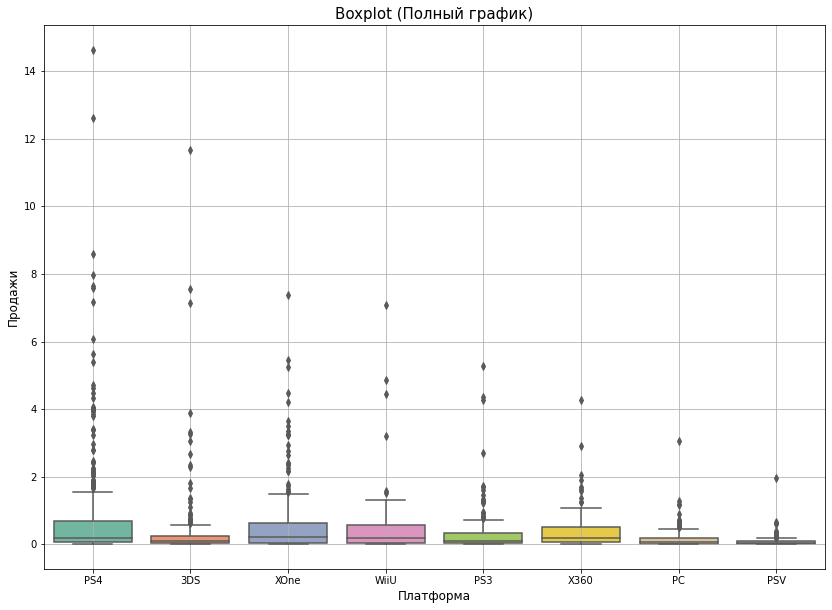

In [34]:
top_8_platforms = filtered_data.query('platform not in ["PSP", "Wii"]')
plt.figure(figsize=(14,10))
sns.boxplot(data=top_8_platforms, x='platform', y='total_item_sales')
plt.title('Boxplot (Полный график)', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.grid(True)
plt.show()

На графике выше видны все выбросы по выручкам в зависимости от платформы. Лидером является PS4, новая на тот момент платформа, на которую направлено внимание пользователей и производителей игр. С 2014 по 2016 год  у нее рекодная выручка по игре в 15 млн., так же большоее количество и болше выбросов вверх, относительно остальных платформ.

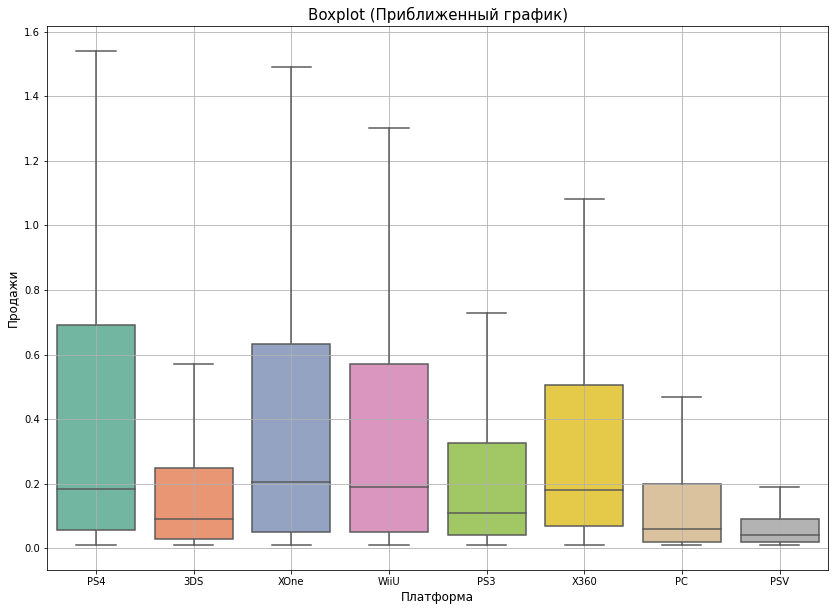

In [35]:
top_8_platforms = filtered_data.query('platform not in ["PSP", "Wii"]')
plt.figure(figsize=(14,10))
sns.boxplot(data=top_8_platforms, x='platform', y='total_item_sales', showfliers=False)
plt.title('Boxplot (Приближенный график)', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.grid(True)
plt.show()

На этом графике видно, что выручка за исключением выбросов у X360, XOne и WiiU получается самая высокая. По этому графику видно, что есть большое количество выбросов вверх у всех платформ, то у каждой платформы есть большое число игр, которые продаются объемами намного выше средних, значительно превосходя медиану и три сигмы.

<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

__Не стоит фильтровать продажи для отрисовки диаграммы размаха__
        
при помощи диаграммы размаха мы смотрим на распределение сырых данных и основные статистики, если мы фильтруем продажи, мы изменяем выборку, а значит и все основные квартили и кол-во выбросов
        
В нашем случае выбросы в максимальной части выборки — это показатели успеха платформы или жанра...     

 #### Продажи игр в зависимости от оценок пользователей и критиков на разных платформах
 <a id='15'></a>

Создадим функцию для вывода диаграммы рассеивания и корреляции между оценками и продажами игр по топ-8 платформ.

In [36]:
def scatterplot_func(name):

        temp = top_8_platforms[top_8_platforms['platform'] == name]

        # Создаем одно изображение с двумя подграфиками (1 строка, 2 столбца)
        fig, axes = plt.subplots(1, 2, figsize=(11, 4))

        # Первый график - критики vs продажи
        sns.scatterplot(x='critic_score', y='total_item_sales', data=temp, ax=axes[0])
        axes[0].set_title(f'График {name} (Оценки критиков)')
        axes[0].set_xlabel('Оценки критиков')
        axes[0].set_ylabel('Продажи')

        # Второй график - пользователи vs продажи
        sns.scatterplot(x='user_score', y='total_item_sales', data=temp, ax=axes[1])
        axes[1].set_title(f'График {name} (Оценки пользователей)')
        axes[1].set_xlabel('Оценки пользователей')
        axes[1].set_ylabel('Продажи')

        # Автоматическая настройка макета для предотвращения перекрытия заголовков
        plt.tight_layout()

        plt.show()

        print(f"Корреляция между оценками критиков и продажами игр равна: {temp['critic_score'].corr(temp['total_item_sales'])}")
        print(f"Корреляция между оценками пользователей и продажами игр равна: {temp['user_score'].corr(temp['total_item_sales'])}")
        print()
        print('-'*120)

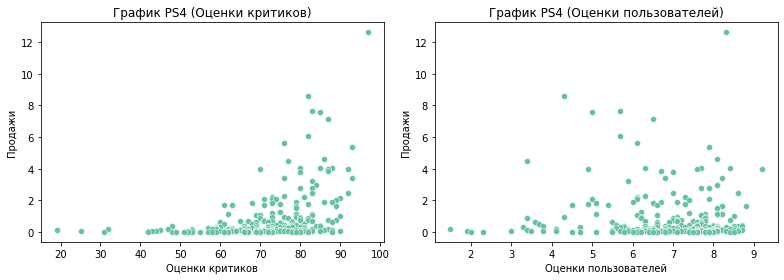

Корреляция между оценками критиков и продажами игр равна: 0.40266141068104083
Корреляция между оценками пользователей и продажами игр равна: -0.04013158973738033

------------------------------------------------------------------------------------------------------------------------


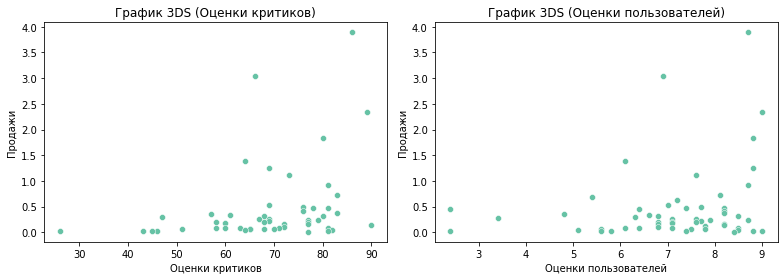

Корреляция между оценками критиков и продажами игр равна: 0.314117492869051
Корреляция между оценками пользователей и продажами игр равна: 0.21519327471370117

------------------------------------------------------------------------------------------------------------------------


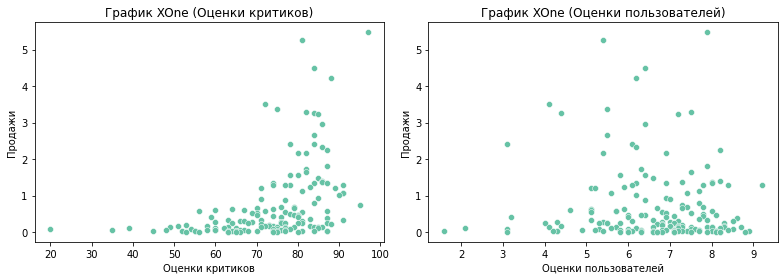

Корреляция между оценками критиков и продажами игр равна: 0.42867694370333226
Корреляция между оценками пользователей и продажами игр равна: -0.07038393161528515

------------------------------------------------------------------------------------------------------------------------


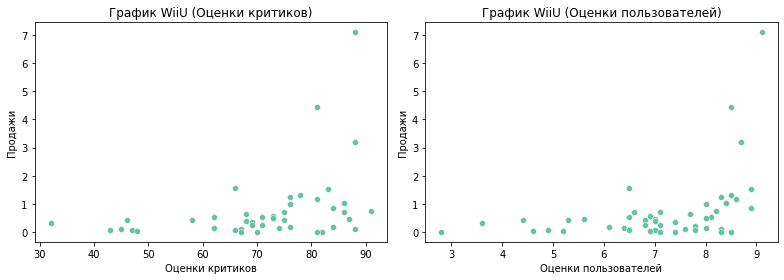

Корреляция между оценками критиков и продажами игр равна: 0.370201412480884
Корреляция между оценками пользователей и продажами игр равна: 0.4079264698680883

------------------------------------------------------------------------------------------------------------------------


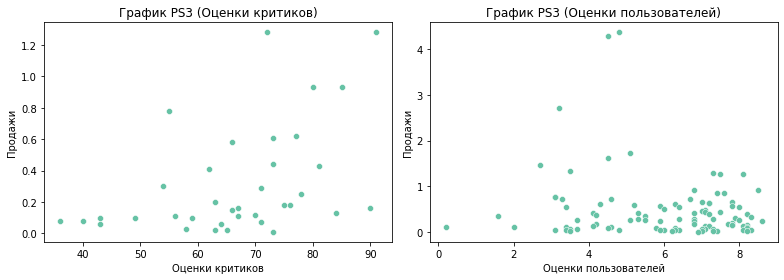

Корреляция между оценками критиков и продажами игр равна: 0.44657460493190704
Корреляция между оценками пользователей и продажами игр равна: -0.16676140905381617

------------------------------------------------------------------------------------------------------------------------


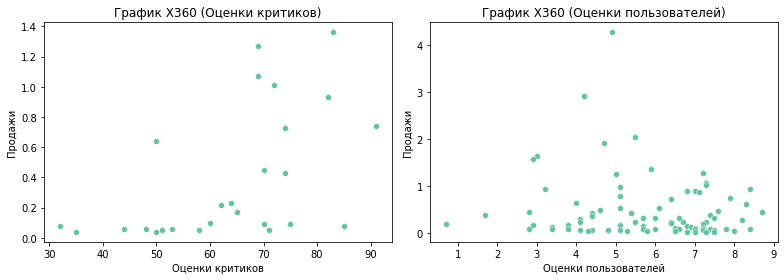

Корреляция между оценками критиков и продажами игр равна: 0.5257228356581523
Корреляция между оценками пользователей и продажами игр равна: -0.13844457561673362

------------------------------------------------------------------------------------------------------------------------


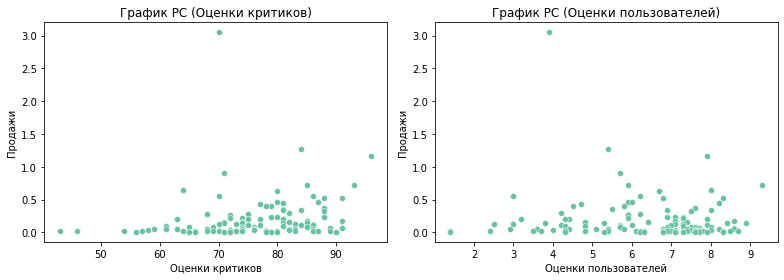

Корреляция между оценками критиков и продажами игр равна: 0.17463413769350036
Корреляция между оценками пользователей и продажами игр равна: -0.07159665579881215

------------------------------------------------------------------------------------------------------------------------


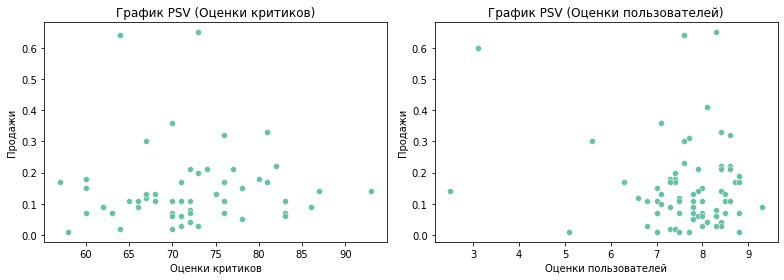

Корреляция между оценками критиков и продажами игр равна: 0.04266490657009526
Корреляция между оценками пользователей и продажами игр равна: -0.1684550626230329

------------------------------------------------------------------------------------------------------------------------


In [37]:
for el in top_8_platforms.platform.unique():
    scatterplot_func(el)

По графикам видная умеренная положительная корреляция 0.35-0.40 между оценками критиков и общей выручкой по играм платформы. Данное правило не соблюдается только для PSV и PC. Там корреляция ниже (0.2 - 0.25). <br> По всем платформам, кроме WiiU, очень низкая, около нулевая корреляция между оценками пользователей и общей выручкой. В WiiU умеренная положительная корреляция - 0.4. То есть на платформе WiiU, оценки пользователей более важны чем оценки критиков.

#### Продажи игр в зависимости от жанров
<a id='16'></a>

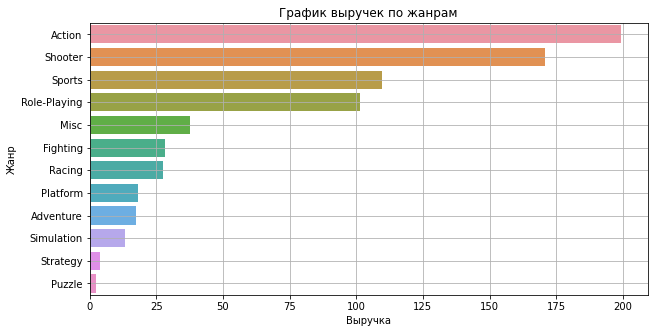

In [38]:
pivot_reven = filtered_data.pivot_table(index='genre', values=['total_item_sales'], aggfunc='sum').sort_values(by='total_item_sales', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=pivot_reven['total_item_sales'], y=pivot_reven.index)
plt.title('График выручек по жанрам')
plt.xlabel('Выручка')
plt.ylabel('Жанр')
plt.grid(True)
plt.show()

Жанрами с самыми высокими продажами являются Action и Shooter, эти жанры в два раза превосходят все осташиеся жанры по выручке. На третьем и четвертом месте с небольшой разницей идут Sports и Role-playing. Замыкает пятерку жанр Misc.

In [39]:
# Создадим сводную таблицу для выявления количества игр по жанру, общей выручкой и коэфициентом продаж.
genre_platf_year = filtered_data.pivot_table(
    index='genre',
    values=['name', 'total_item_sales'],
    aggfunc={'name': 'count', 'total_item_sales': 'sum'}
)
genre_platf_year['sales_ratio'] = genre_platf_year['total_item_sales'] / genre_platf_year['name']
genre_platf_year = genre_platf_year.sort_values(by='sales_ratio', ascending=False)
genre_platf_year.head(10)

,name,total_item_sales,sales_ratio
genre,,,
Shooter,128,170.94,1.335469
Sports,161,109.48,0.680000
Platform,38,18.09,0.476053
Fighting,60,28.22,0.470333
Role-Playing,221,101.44,0.459005
Racing,69,27.52,0.398841
Misc,113,37.55,0.332301
Action,619,199.36,0.322068
Simulation,44,13.13,0.298409


Видим что Shooter это жанр в которм каждая игра в среднем продается гораздо большими объемами чем по отрасли. Самый эффективный жанр в плане продаж.

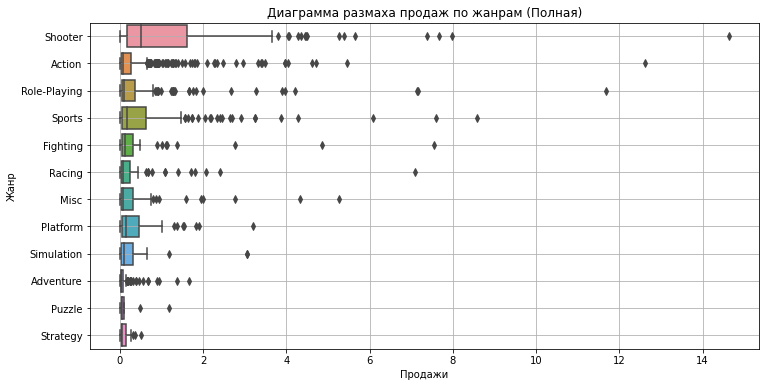

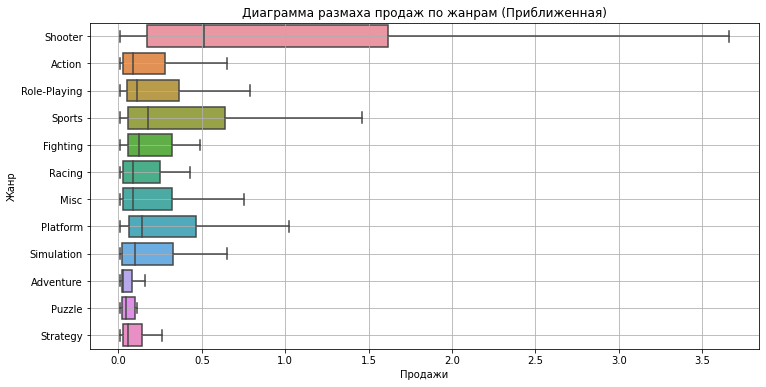

In [40]:
# Создадим диаграмму размаха, для более детального рассмотрения продаж игр по жанрам.

# С выбросами
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_item_sales', y='genre', data=filtered_data, orient='h', showfliers=True)
plt.title('Диаграмма размаха продаж по жанрам (Полная)')
plt.xlabel('Продажи')
plt.ylabel('Жанр')
plt.grid(True)
plt.show()

# Без выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_item_sales', y='genre', data=filtered_data, orient='h', showfliers=False)
plt.title('Диаграмма размаха продаж по жанрам (Приближенная)')
plt.xlabel('Продажи')
plt.ylabel('Жанр')
plt.grid(True)
plt.show()

Медиана по большинству игр колеблется в районе 100-200 млн.<br>На этих графиках можно наблюдать более подробно распределение продаж по игровым жанрам. Явный лидер - жанр Shooter, самая высокая медиана (0.5 млн), самые высокие максимальные значения(3.7 млн). И собравшая больше всех игра с рекордной выручкой в 15 млн. Жанр Action, занимающий первое место в общем количестве продаж, на диаграмме размаха не имеет такого большого разброса данных и максимального значения. Лидерство жанра Action связано с кратно большим количеством игр. Получается, что игры жанра Shooter обладают более высокой эффективностью в плане продаж. Жанр Action захватил лидерство благодаря большому объему. Жанр  Sport имеет хорошие показатели, занимают второе место по эффективности продаж. Третье место по эффективности продаж занимает жанр Platform. 
<br> Более стабильными и эффективными жанрами по диаграмме размаха являются жанры Shooter, Sports и Platform.

<span style="font-size: 18px;"> 
Вывод по исследовательскому анализу данных:
</span><br>
<ul>
    <li>До 2009 года индустрия игр росла интенсивно, с 2009 года по 2016 идет снижение количества выпускаемых игр и продаж по играм.</li>
    <li>Средний срок существования игровой платформы - 7 лет. Медиана около 6 лет. Больше 10 лет проживают только 25% из всех платформ выборки.</li>
    <li>С 2014 по 2016 год на рынке лидируют платформы PS4, 3DS, XOne.</li>
    <li>Оценки игр критиками имеют более высокое влияние на мнения пользователей, чем оценки ирг другими пользователями.</li>
    <li>Топ-3 продаваемых жанра это Action, Shooter и Sports. Причем Action, это действительно самый популярный жанр из-за большого количества игр создаваемых в этом жанре, такой аналог жанра-бестселлера.  Остальные два жанра более нишевые, там создается меньше игр, но есть своя база поклонников, обеспечивающая им хорошие продажи.</li>
</ul>


<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит проанализировать прибыльность жанров на диаграмме размаха, сравнить медианные продажи на каждом жанре и проверить какая из них более стабильна и имеет более длинный ряд успешно продающихся игр
        
График нарисовать __в двух масштабах с выбросами и без__ (чтобы было видно 0.75-квантиль)

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит добавить общий вывод по результатам выполнения третьего раздела проекта

### Составьте портрет пользователя каждого региона
<a id='17'></a>

#### Самые популярные платформы (топ-5)
<a id='18'></a>


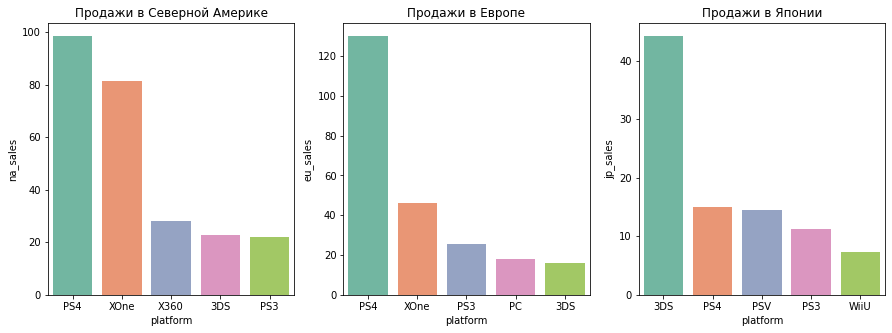

In [41]:
# Группировка данных по платформам и регионам
platforms_by_region = filtered_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

df_na = platforms_by_region.sort_values(by='na_sales', ascending=False).head(5)
df_eu = platforms_by_region.sort_values(by='eu_sales', ascending=False).head(5)
df_jp = platforms_by_region.sort_values(by='jp_sales', ascending=False).head(5)

# Построение графиков для каждого региона
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=df_na.index, y='na_sales', data=df_na)
plt.title('Продажи в Северной Америке')

plt.subplot(1, 3, 2)
sns.barplot(x=df_eu.index, y='eu_sales', data=df_eu)
plt.title('Продажи в Европе')

plt.subplot(1, 3, 3)
sns.barplot(x=df_jp.index, y='jp_sales', data=df_jp)
plt.title('Продажи в Японии')

plt.show()

В Северной Америке лучше всего продаются игры для PS4, XOne и X360. В Европе лидерство так же держит PS4, далее идет PS3 и XOne. В Японии на первом месте, с большим отрывом идет 3DS.На втором месте PS3, на третьем PSV.

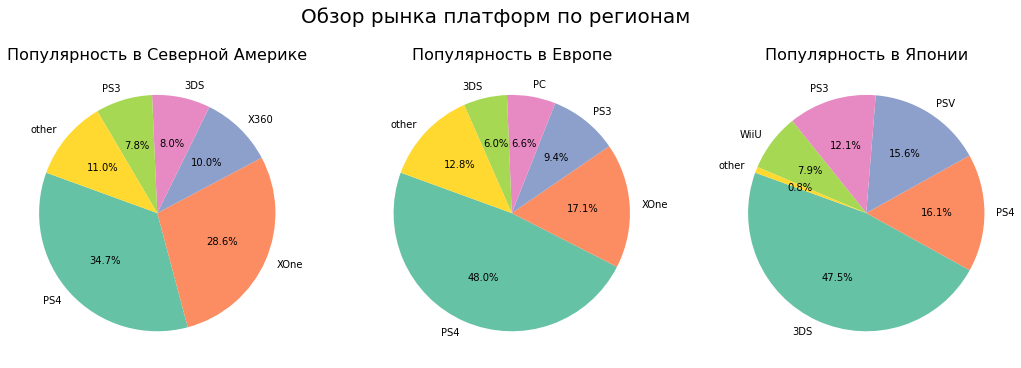

In [42]:
# Создадим график-пирог, в котором будут показаны топ-5 платформ по всем регионам,
# и остальные платформы, объединенные в категорию other.

def make_other(data, num):
    # Индексы, которые мы хотим объединить
    indices_to_combine = data.tail(num).index

    # Создаем новую строку, объединяя значения для указанных индексов
    other_row = pd.DataFrame({'eu_sales': [data.loc[indices_to_combine, 'eu_sales'].sum()],
                              'jp_sales': [data.loc[indices_to_combine, 'jp_sales'].sum()],
                              'na_sales': [data.loc[indices_to_combine, 'na_sales'].sum()]},
                             index=['other'])

    # Удаляем строки, которые мы объединили в other
    data = data.drop(indices_to_combine)

    # Добавляем строку other к таблице
    data = data.append(other_row)

    return data

df_na = platforms_by_region.sort_values(by='na_sales', ascending=False)
df_eu = platforms_by_region.sort_values(by='eu_sales', ascending=False)
df_jp = platforms_by_region.sort_values(by='jp_sales', ascending=False)

df_na_result = make_other(df_na, 5)
df_eu_result = make_other(df_eu, 5)
df_jp_result = make_other(df_jp, 5)

def plot_pie_chart(ax, data, title):
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=160)
    ax.set_title(title, fontsize=16)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_pie_chart(axes[0], df_na_result['na_sales'], 'Популярность в Северной Америке')
plot_pie_chart(axes[1], df_eu_result['eu_sales'], 'Популярность в Европе')
plot_pie_chart(axes[2], df_jp_result['jp_sales'], 'Популярность в Японии')

fig.suptitle('Обзор рынка платформ по регионам', fontsize=20)

plt.show()


На графике выше видим процентое распределение и соотношение популярности платформ по регионам. В Северной Америке в категорию other попадают 11 процентов от доли рынка, в Европе 12.8 процентов. В Японии доля категории other совсем мала, только 0.8 процента.

<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Портреты клиентов нарисованы, молодец 
        
Стоит оформить графики раздела TOП-5:
 
+ оформить "двухуровневый заголовок" - и у всех трех графиков вместе, и у каждого из трех по отдельности;
+ при анализе платформ и жанров стоит все, что не вошло в ТОП-5, объединять в категорию "другие" - так картина анализа будет более полной

        
Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе
        
https://proproprogs.ru/modules/matplotlib-otobrazhenie-neskolkih-koordinatnyh-osey-v-odnom-okne
        
    

#### Самые популярные жанры (топ-5)
<a id='18'></a>

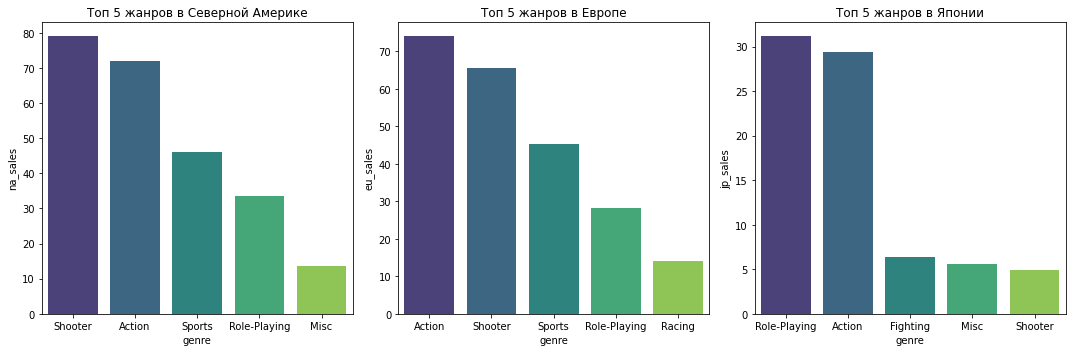

In [43]:
# Группировка данных по жанрам и регионам
genres_by_region = top_8_platforms.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

df_na = genres_by_region.sort_values(by='na_sales', ascending=False).head(5)
df_eu = genres_by_region.sort_values(by='eu_sales', ascending=False).head(5)
df_jp = genres_by_region.sort_values(by='jp_sales', ascending=False).head(5)

# Построение графиков для каждого региона
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=df_na.index, y='na_sales', data=df_na, palette='viridis')
plt.title('Топ 5 жанров в Северной Америке')

plt.subplot(1, 3, 2)
sns.barplot(x=df_eu.index, y='eu_sales', data=df_eu, palette='viridis')
plt.title('Топ 5 жанров в Европе')

plt.subplot(1, 3, 3)
sns.barplot(x=df_jp.index, y='jp_sales', data=df_jp, palette='viridis')
plt.title('Топ 5 жанров в Японии')

plt.tight_layout()
plt.show()

Самые популярные жанры в Северной Америке: Shooter, Action, Sports. Аналогичная тройка лидеров в Европе. С небольшим отличием - в Северной Америке пятерку лидеров замыкает Misc, в Европе - Racing. В Японии на пером месте Role-playing, на втором Action. Оставшиеся жанры из топ 5 Японии, сильно отстают по продажам от двойки лидеров.

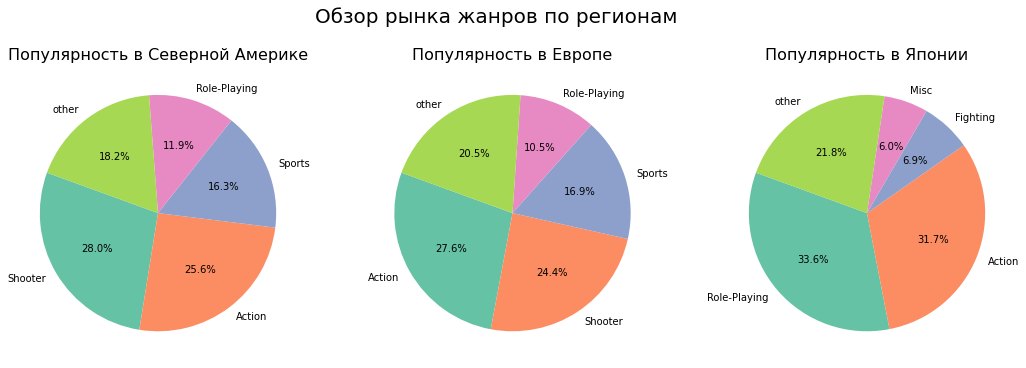

In [44]:
# Построим круговую диаграмму с топ-5 игровыми жанрами по регионам
df_na = genres_by_region.sort_values(by='na_sales', ascending=False)
df_eu = genres_by_region.sort_values(by='eu_sales', ascending=False)
df_jp = genres_by_region.sort_values(by='jp_sales', ascending=False)

df_na_result = make_other(df_na, 8)
df_eu_result = make_other(df_eu, 8)
df_jp_result = make_other(df_jp, 8)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_pie_chart(axes[0], df_na_result['na_sales'], 'Популярность в Северной Америке')
plot_pie_chart(axes[1], df_eu_result['eu_sales'], 'Популярность в Европе')
plot_pie_chart(axes[2], df_jp_result['jp_sales'], 'Популярность в Японии')

fig.suptitle('Обзор рынка жанров по регионам', fontsize=20)

plt.show()

В Северной Америке самые популярные жанры Shooter (28%), Action (25.6%), Sports(16.3 %). В Европе самые популярные Action (27.6 %), Shooter (24.4%), Sports (16.9%). В Японии самые популярные Role-playing (38.6%), Action (31.7%), Fighting (6.9%).

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
<a id='19'></a>

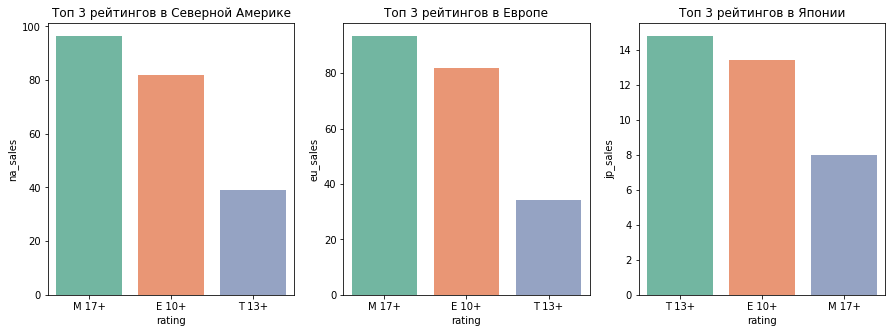

In [45]:
# Группировка рейтингов для каждого региона
rating_by_region = top_8_platforms.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

df_na = rating_by_region.sort_values(by='na_sales', ascending=False).head(5)
df_eu = rating_by_region.sort_values(by='eu_sales', ascending=False).head(5)
df_jp = rating_by_region.sort_values(by='jp_sales', ascending=False).head(5)

# Построение графиков для каждого региона
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=df_na.index, y='na_sales', data=df_na)
plt.title('Топ 3 рейтингов в Северной Америке')

plt.subplot(1, 3, 2)
sns.barplot(x=df_eu.index, y='eu_sales', data=df_eu)
plt.title('Топ 3 рейтингов в Европе')

plt.subplot(1, 3, 3)
sns.barplot(x=df_jp.index, y='jp_sales', data=df_jp)
plt.title('Топ 3 рейтингов в Японии')

plt.show()

В Северной Америке и Европе примерно одинаковое распределение по самым популярным играм в разрезе их возрастного рейтинга. Самые популярные это игры 17+, далее идут игры для 10+, на третьем месте игры 13+. В Японии игры жанра 10+ занимают первое место, далее идут игры 13+, и на третьем месте жанр 17+.

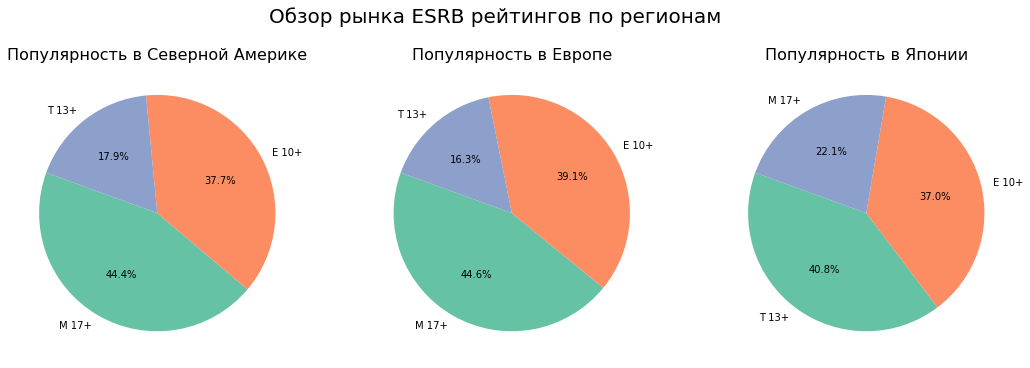

In [46]:
# Построение круговой диаграммы с самыми популярными возрастными рейтингами по регионам
df_na = rating_by_region.sort_values(by='na_sales', ascending=False)
df_eu = rating_by_region.sort_values(by='eu_sales', ascending=False)
df_jp = rating_by_region.sort_values(by='jp_sales', ascending=False)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_pie_chart(axes[0], df_na['na_sales'], 'Популярность в Северной Америке')
plot_pie_chart(axes[1], df_eu['eu_sales'], 'Популярность в Европе')
plot_pie_chart(axes[2], df_jp['jp_sales'], 'Популярность в Японии')

fig.suptitle('Обзор рынка ESRB рейтингов по регионам', fontsize=20)

plt.show()

В Северной Америке самые популярные рейтинги М 17+ (44.4%), У 10+ (37.7%), Т 13+ (17.9%). В Европе самые популярные М 17+ (44.6%), Е 10+ (39.1%), Т 13+ (16.1%). В Японии самые популярные Т 13+ (40.8%), E 10+ (37%), M 17+ (22.1%)

###  Проверка гипотез
<a id='20'></a>

#### Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br>Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.
<a id='22'></a>

In [47]:
xbox_ratings = filtered_data[filtered_data['platform'] == 'XOne']['user_score']
pc_ratings = filtered_data[filtered_data['platform'] == 'PC']['user_score']

p_value = st.ttest_ind(xbox_ratings, pc_ratings, alternative='two-sided', nan_policy='omit')

print(f'Среднее значение рейтинга Xbox One: {xbox_ratings.mean()}')
print(f'Среднее значение рейтинга PC: {pc_ratings.mean()}')
      
alpha = 0.05 

print(f'P-значение: {p_value.pvalue}')

if p_value.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC - различаются.")
else:
    print("Не отвергаем нулевую гипотезу")

Среднее значение рейтинга Xbox One: 6.594545364379883
Среднее значение рейтинга PC: 6.298360347747803
P-значение: 0.10450490196035389
Не отвергаем нулевую гипотезу


Учитывая, что P-значение больше alpha, мы не отвергаем нулевую гипотезу. Таким образом, на основе этого теста нет статистически значимых различий в средних пользовательских рейтингах между платформами Xbox One и PC. Чем выше p-value, тем более жизнеспособна нулевая гипотеза, посколько p-value  выше определенного нами уровня значимости, то не ее не отвергаем.

<div class="alert alert- da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Что означает на языке статистики P-значение: 0.14012686962472454

In [48]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


#### Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые. <br> Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.
<a id='23'></a>

In [49]:
action_ratings = filtered_data[filtered_data['genre'] == 'Action']['user_score']
sports_ratings = filtered_data[filtered_data['genre'] == 'Sports']['user_score']

p_value = st.ttest_ind(action_ratings, sports_ratings, alternative='two-sided', nan_policy='omit')

print(f'Среднее значение рейтинга Xbox One: {action_ratings.mean()}')
print(f'Среднее значение рейтинга PC: {sports_ratings.mean()}')
      
alpha = 0.05 

print(f'P-значение: {p_value.pvalue}')

if p_value.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports - различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports -одинаковые.")

Среднее значение рейтинга Xbox One: 6.760605812072754
Среднее значение рейтинга PC: 5.2251973152160645
P-значение: 2.871200935124735e-19
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports - различаются.


P-значение значительно меньше alpha, мы отвергаем нулевую гипотезу. Таким образом, на основе этого теста существуют статистически значимые различия в средних пользовательских рейтингах между жанрами Action и Sports.

### Общий вывод
<a id='24'></a>

Целью данного проекта было проанализировать продажи игр для интернет-магазина Стримчик. С целью выявления переспективных игровых направлений на 2017 год, найти потенциально попурный продукт. Стримчик продает игры по всему миру, исходя из дата фрейма основными и самыми важными рынками являются три региона: Северная Америка, Европа и Япония. Анализ показал что есть положительная взаимосвязь между оценками критиков и спросом на игры. В данном случае компании рекомендуется отслеживать отзывы критиков, для понимание точек возможного роста спроса на конкретные игры. С целью полного удовлетворения спроса со стороны потребителей.<br><br> Была выявлена пятерка платформ с самым большим количеством игр: PS4, PSV, PS3, 3DS, XOne . У этих платформ самый большой набор игр, и там должно быть самое большое число пользователей из-за ассортимента. При прочих равных это тенденция продолжится.<br><br> В результате анализа сформируем рекомендации для трех локальных рынков. 
<br><br><strong>Северная Америка:</strong>
<ul>
 <li><strong>Самые популярные платформы с долями рынка:</strong> PS4 (34.7%), XOne (28.6%), X360(10%)</li><br>
 <li><strong>Самые популярные игровые жанры с долями рынка:</strong> Shooter (28%), Action (25.6%), Sports(16.3 %)</li><br>
 <li><strong>Самые популярные рейтинги игр (ESRB) с долями рынка:</strong>  М 17+ (44.4%), У 10+ (37.7%), Т 13+ (17.9%) </li><br>
</ul>
<strong>Европа:</strong>
<ul>
 <li><strong>Самые популярные платформы с долями рынка:</strong> PS4 (48%), XOne (17.1%) , PS3 (9.4%) </li><br>
 <li><strong>Самые популярные игровые жанры с долями рынка:</strong> Action (27.6 %), Shooter (24.4%), Sports (16.9%)</li><br>
    <li><strong>Самые популярные рейтинги игр (ESRB) с долями рынка:</strong> М 17+ (44.6%), Е 10+ (39.1%), Т 13+ (16.1%)</li><br>
</ul>
<br>
<strong>Япония:</strong>
<ul>
 <li><strong>Самые популярные платформы с долями рынка:</strong> 3DS (44%), PS4 (23%), PSV (16%)</li><br>
 <li><strong>Самые популярные игровые жанры с долями рынка:</strong> Role-playing (38.6%), Action (31.7%), Fighting (6.9%)</li><br>
 <li><strong>Cамые популярные рейтинги игр (ESRB) с долями рынка:</strong> Т 13+ (40.8%), E 10+ (37%), M 17+ (22.1%)</li><br>
</ul>

Для рынков Северной Америки и Европы в 2017, перспективнми будут игровые направления:  Action, Shooter, Sports. С возрастными рейтингами M17+, E10+, T13+. Для рынка Северной Америки лучше сделать упор на продажу приставок: PS4, XOne, X360 и соответственно, игр под них. Доля X360, со временем будет падать, это приставка более старого поколения и будет замещаться XOne и прочими новинками рынка. Для рынка Европы лучше сделать упор на продажу приставок: PS4, PS3, XOne и соответственно, игр под них.Но, необходимо учитывать, что PS4, со временем заменит PS3, и в дальнейшем доля PS3, будет падать. Наиболее популярными жанрами для рынков еверной Америки и Европы будут оставаться: M17+, E10+, T13+. <br> Рынок Японии по-своему уникален. Там будут другие рекомендации. Компании Стримчик следует сделать упор на продажу платформ и игр к приставкам: 3DS, PS3, PSV. В жанрах Role-playing, Action, Misc. Наибольший приоретет сделать жанрам E10+, T13+, так же менее весомый, но занимающий хорошую долю рынка жанр М17+.


### Бонус

In [50]:
data_games = pd.read_csv('/datasets/games.csv')

In [51]:
data_games.columns = map(str.lower, data_games.columns)

In [52]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [53]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [54]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [55]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [56]:
# check
# круги + категория другие

# функция не работает на версии библиотеки pandas = 2.0 (метод .append устарел)

def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
# Цветовая гамма не подбиралась специально под платформы, кому-что попадется, 😉      
      
    labels_c=sales.platform
    colours = {'Wii':'C60', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'lightsteelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'Fuchsia', '2600':'C15', 'PSP':'C48', 
               'XOne':'LimeGreen',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

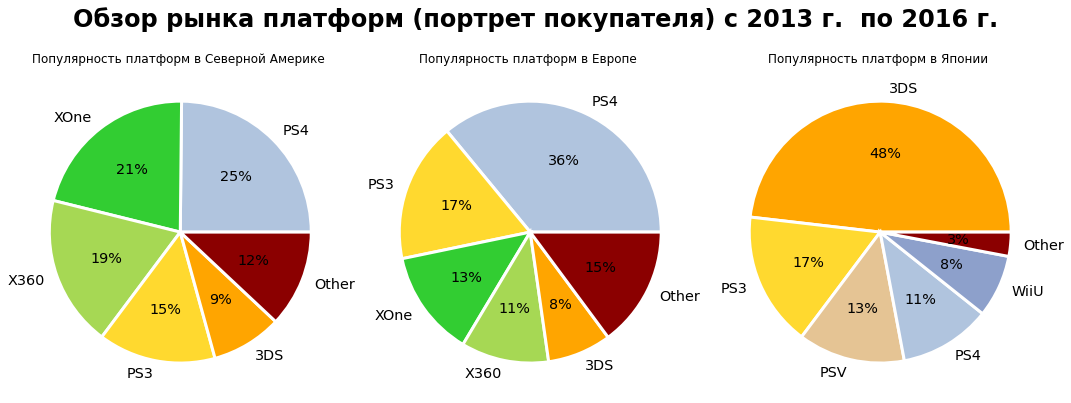

In [57]:
# check
# круги в ряд

x_year = 2013

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

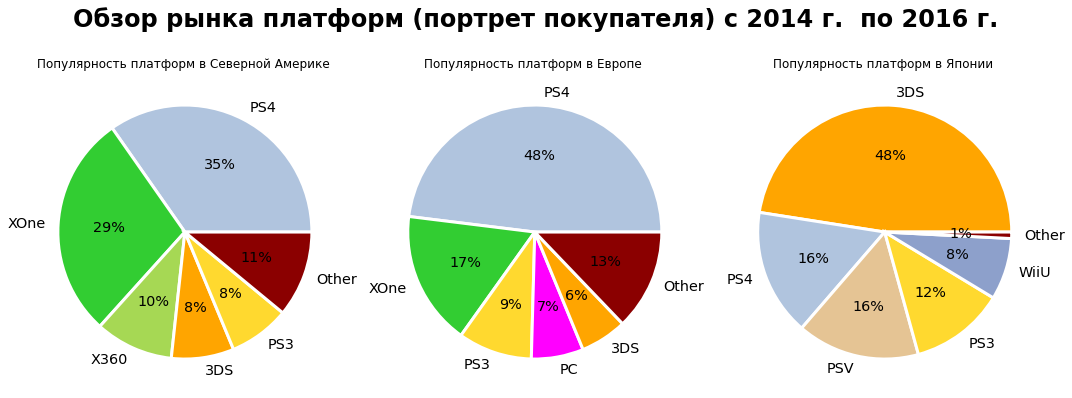

In [58]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

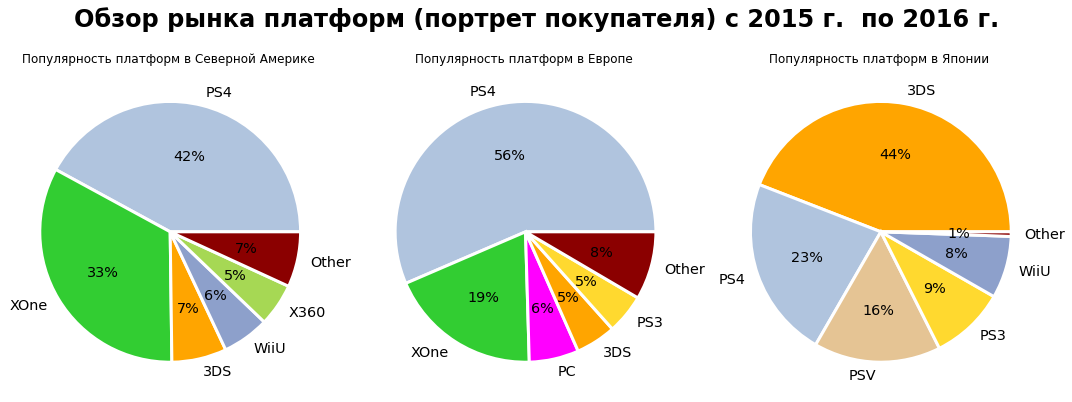

In [59]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])